# Trabajo Práctico 3 - Procesamiento de Imágenes

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

/home/agustin/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Archivos utilizados para la confección del Trabajo Práctico:
- `img_binaria2.png`






## 1. Operadores morfologicos

### Ejercicio 1

> Erosión y dilatación básicas: Aplicar erosión y dilatación sobre una imagen binaria. Usar diferentes tamaños de kernel. Comparar la imagen original y la resultante de aplicar el operador. Comentar los efectos visuales.

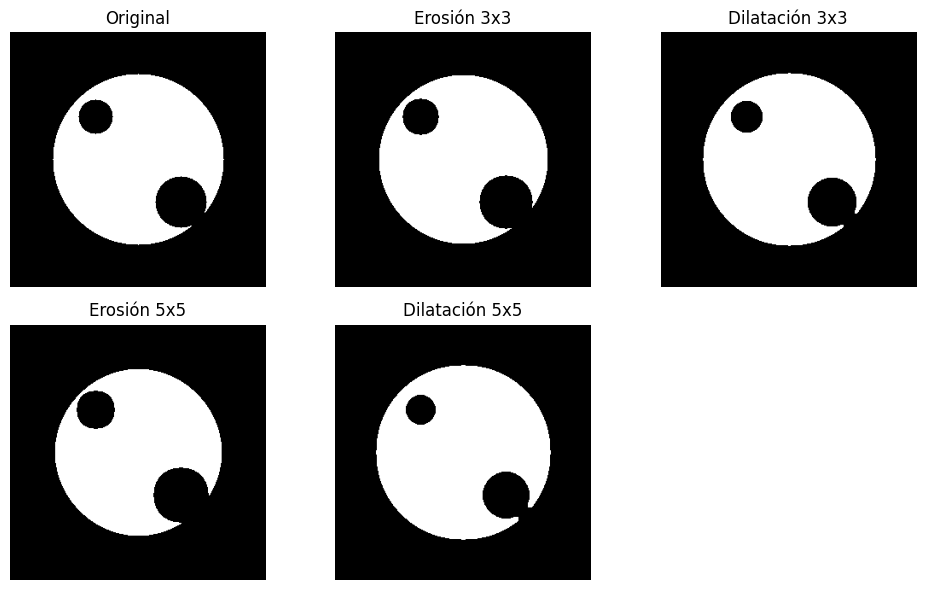

In [2]:

# Cargar imagen binaria (0 y 255)
imagen = cv2.imread('./imagenes/img_binaria2.png', 0)

# Asegurarse de que sea binaria (por si acaso)
_, imagen_binaria = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

# Crear kernels de diferentes tamaños
kernel_3 = np.ones((3,3), np.uint8)
kernel_5 = np.ones((5,5), np.uint8)

# Aplicar erosión y dilatación
erosion_3 = cv2.erode(imagen_binaria, kernel_3, iterations=1)
dilatacion_3 = cv2.dilate(imagen_binaria, kernel_3, iterations=1)

erosion_5 = cv2.erode(imagen_binaria, kernel_5, iterations=1)
dilatacion_5 = cv2.dilate(imagen_binaria, kernel_5, iterations=1)

# Mostrar resultados
titulos = ['Original', 'Erosión 3x3', 'Dilatación 3x3', 'Erosión 5x5', 'Dilatación 5x5']
imagenes = [imagen_binaria, erosion_3, dilatacion_3, erosion_5, dilatacion_5]

plt.figure(figsize=(10,6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(imagenes[i], cmap='gray')
    plt.title(titulos[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Al aplicar operaciones morfológicas sobre la imagen binaria, se observa que la erosión reduce el tamaño de los objetos blancos, eliminando bordes finos y achicando las figuras, especialmente con kernels más grandes como el de 5x5. En cambio, la dilatación produce el efecto contrario: expande las regiones blancas, cerrando pequeños huecos y suavizando contornos. Comparando ambas operaciones con distintos tamaños de kernel, se evidencia que el tamaño del elemento estructurante influye directamente en la magnitud del cambio: a mayor kernel, mayor la transformación.

### Ejercicio 4
>(*) Apertura y clausura morfológica: Aplicar apertura y clausura para eliminar ruido o cerrar huecos.
Comparar la imagen original y la resultante de aplicar el operador. Comentar los efectos visuales.
Comparar con los resultados anteriores. Mostrar 4 subplots: original, apertura, cierre, diferencia entre ambos.

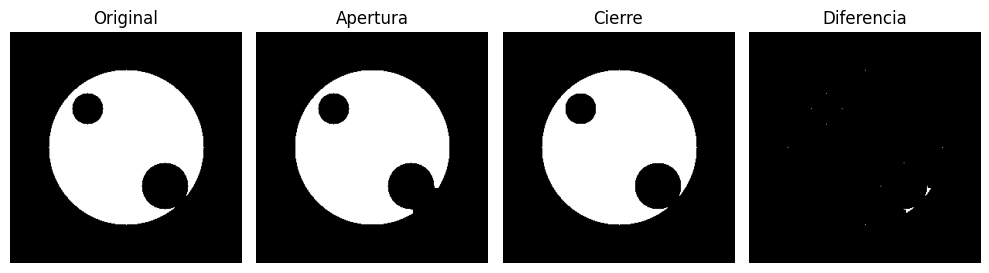

In [4]:
# Cargar imagen binaria
imagen = cv2.imread('./imagenes/img_binaria2.png', 0)
_, imagen_binaria = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

# Crear kernel
kernel = np.ones((5, 5), np.uint8)

# Apertura: erosión seguida de dilatación
apertura = cv2.morphologyEx(imagen_binaria, cv2.MORPH_OPEN, kernel)

# Clausura: dilatación seguida de erosión
cierre = cv2.morphologyEx(imagen_binaria, cv2.MORPH_CLOSE, kernel)

# Diferencia absoluta entre ambas
diferencia = cv2.absdiff(apertura, cierre)

# Mostrar resultados
titulos = ['Original', 'Apertura', 'Cierre', 'Diferencia']
imagenes = [imagen_binaria, apertura, cierre, diferencia]

plt.figure(figsize=(10, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(imagenes[i], cmap='gray')
    plt.title(titulos[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

Con la apertura, los bordes del símbolo aparecen más limpios y simplificados, eliminando algunas zonas con bordes filosos o ruidosos. Por su parte, el cierre hace que el interior del símbolo blanco se vea más continuo, con bordes más robustos y sin huecos. La imagen de diferencia resalta las zonas afectadas por ambas operaciones, donde se observan pequeñas modificaciones en los bordes y detalles finos, lo que indica que, aunque la forma global se mantiene, existen alteraciones estructurales sutiles.

### Ejercicio 5
>(*) Operación de gradiente morfológico: Aplicar el gradiente morfológico (dilatación - erosión). Visualizar
los bordes obtenidos mediante esta operación.

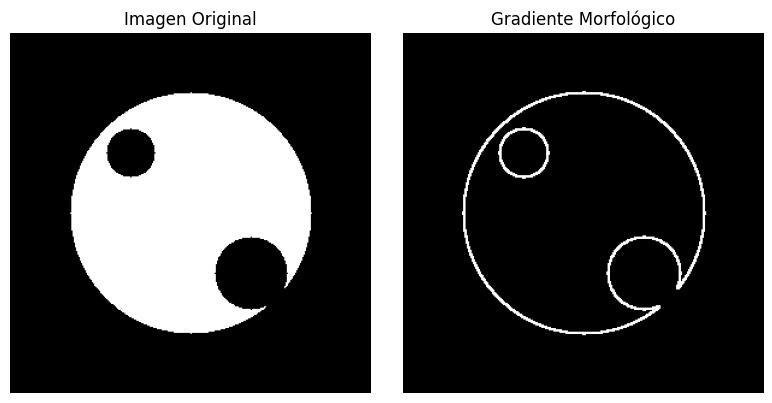

In [5]:
# Cargar imagen binaria
imagen = cv2.imread('./imagenes/img_binaria2.png', 0)
_, imagen_binaria = cv2.threshold(imagen, 127, 255, cv2.THRESH_BINARY)

# Crear kernel
kernel = np.ones((3, 3), np.uint8)

# Aplicar operación de gradiente morfológico
gradiente = cv2.morphologyEx(imagen_binaria, cv2.MORPH_GRADIENT, kernel)

# Mostrar resultados
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradiente, cmap='gray')
plt.title('Gradiente Morfológico')
plt.axis('off')

plt.tight_layout()
plt.show()

La operación de gradiente morfológico aplicada a la imagen permite visualizar de forma clara y precisa los bordes de las región blanca. Como se observa en la figura, el resultado destaca únicamente los contornos del símbolo, eliminando el interior de la misma. Esto se logra al calcular la diferencia entre la dilatación y la erosión de la imagen original.

### Ejercicio 7

> (*) Segmentación básica con umbral + morfología: Aplicar umbral, luego apertura y cierre para
mejorar el resultado. Ideal como paso previo a una segmentación más elaborada.

In [6]:
# Cargar imagen en escala de grises
imagen = cv2.imread('./imagenes/imagen_con_ruido_y_huecos.png', 0)

# 1. Aplicar umbral fijo (puede ajustarse según la imagen)
_, umbralizada = cv2.threshold(imagen, 200, 255, cv2.THRESH_BINARY)

# 2. Crear kernel
kernel = np.ones((3, 3), np.uint8)

# 3. Aplicar apertura (elimina ruido)
apertura = cv2.morphologyEx(umbralizada, cv2.MORPH_OPEN, kernel)

# 4. Aplicar cierre (rellena huecos)
cierre = cv2.morphologyEx(apertura, cv2.MORPH_CLOSE, kernel)

# 5. Mostrar resultados
plt.figure(figsize=(10, 4))

plt.subplot(1, 4, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(umbralizada, cmap='gray')
plt.title('Umbral')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(apertura, cmap='gray')
plt.title('Apertura')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cierre, cmap='gray')
plt.title('Apertura + Cierre')
plt.axis('off')

plt.tight_layout()
plt.show()

[ WARN:0@77.726] global loadsave.cpp:268 findDecoder imread_('./imagenes/imagen_con_ruido_y_huecos.png'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/morph.dispatch.cpp:1163: error: (-215:Assertion failed) !_src.empty() in function 'morphologyEx'


A partir de las figuras mostradas, se observa que la aplicación del umbral permite separar las figuras del fondo lleno de ruido, pero aún se conserva algo de ruido presente en los bordes de las mismas. La operación de apertura resulta efectiva para eliminar parte de este inconveniente. Al aplicar posteriormente la operación de cierre, se logra definir de forma más pulida los bordes de las figuras, especialmente de su interior.